# Stochastic Models in Finance
By: Adonis JAMAL

In [5]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

## TP Question 1 : Monte Carlo for the Black-Scholes model


In [11]:
# Model values
S0 = 100    # initial stock price
K = 100     # strike price
T = 1.0     # time to maturity in years
r = 0.05    # risk-free rate
sigma = 0.2 # volatility

# Black Scholes formula for European call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Delta of the call option
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Gamma of the call option
def gamma_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

In [13]:
S_vec = np.linspace(50, 150, 100)
T_vec = [0.1, 0.5, 1.0, 2.0]

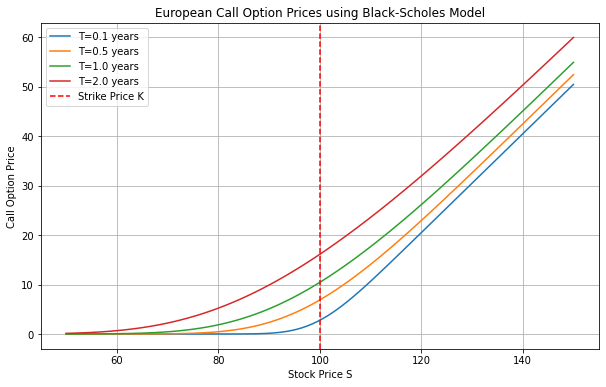

In [14]:
# Price of European call option at different maturities using Black-Scholes formula

plt.figure(figsize=(10, 6))
for T in T_vec:
    call_prices = [black_scholes_call(S, K, T, r, sigma) for S in S_vec]
    plt.plot(S_vec, call_prices, label=f'T={T} years')

plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('European Call Option Prices using Black-Scholes Model')
plt.xlabel('Stock Price S')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()

Le prix du call est une fonction croissante et convexe de $S_0$. Plus la maturité $T$ est longue, plus le prix de l'option est élevé.

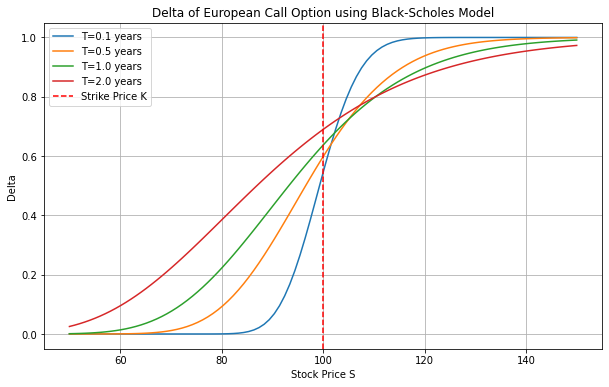

In [15]:
# Delta Graph

plt.figure(figsize=(10, 6))
for T in T_vec:
    deltas = [delta_call(S, K, T, r, sigma) for S in S_vec]
    plt.plot(S_vec, deltas, label=f'T={T} years')

plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('Delta of European Call Option using Black-Scholes Model')
plt.xlabel('Stock Price S')
plt.ylabel('Delta')
plt.legend()
plt.grid(True)
plt.show()

Le Delta (sensibilité du prix de l'option au prix du sous-jacent) va de 0 à 1 pour un call. Il est proche de 0 lorsque l'option est très out of the money (prix du sous-jacent très inférieur au strike price) et proche de 1 lorsque l'option est très in the money (prix du sous-jacent très supérieur au strike price). Le Delta augmente avec la maturité $T$ car une option avec une maturité plus longue a une probabilité plus élevée d'être dans le money à l'échéance. De plus, plus le $T$ est faible, plus la transition de 0 à 1 est abrupte autour du strike price $K$.

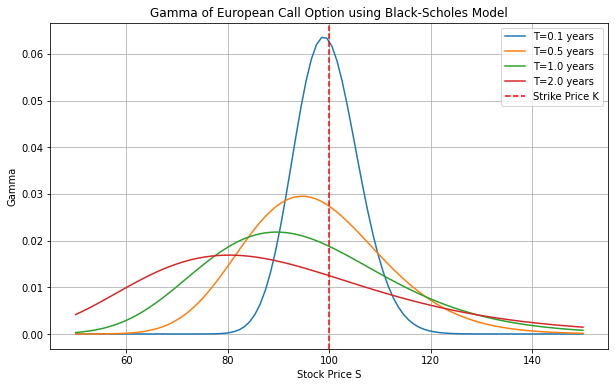

In [16]:
# Gamma Graph

plt.figure(figsize=(10, 6))
for T in T_vec:
    gammas = [gamma_call(S, K, T, r, sigma) for S in S_vec]
    plt.plot(S_vec, gammas, label=f'T={T} years')

plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('Gamma of European Call Option using Black-Scholes Model')
plt.xlabel('Stock Price S')
plt.ylabel('Gamma')
plt.legend()
plt.grid(True)
plt.show()

Le Gamma (convexité ou sensibilité du Delta au prix du sous-jacent) est toujours positif pour un call. Il atteint son maximum lorsque le prix du sous-jacent est proche du strike price $K$. Le Gamma diminue avec l'augmentation de la maturité $T$ car les options à plus long terme sont moins sensibles aux variations immédiates du prix du sous-jacent. Il est d'autant plus élevé que l'option est proche de l'échéance, reflétant une plus grande sensibilité du Delta aux variations du prix du sous-jacent à court terme.

In [17]:
def monte_carlo_call_price(S0, K, T, r, sigma, num_simulations):
    # Simulate end stock prices
    Z = np.random.standard_normal(num_simulations)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    # Calculate N payoffs
    payoffs = np.maximum(ST - K, 0)

    # Discounted expected payoff
    discounted_payoffs = np.exp(-r * T) * payoffs
    price = np.mean(discounted_payoffs)

    # 95% Confidence Interval
    SE = np.std(discounted_payoffs) / np.sqrt(num_simulations)    
    ci_low = price - 1.96 * SE
    ci_high = price + 1.96 * SE

    return price, ci_low, ci_high

True Black-Scholes Price: 16.1268


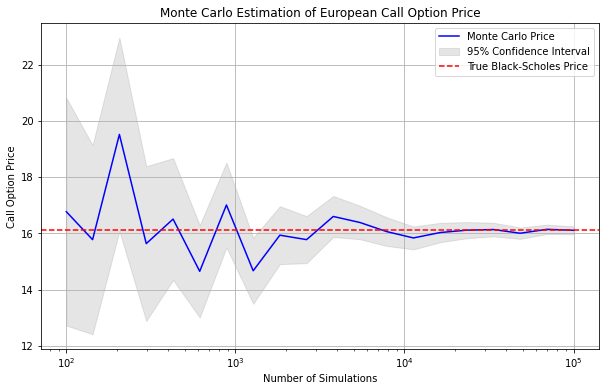

In [28]:
true_price = black_scholes_call(S0, K, T, r, sigma)
print(f"True Black-Scholes Price: {true_price:.4f}")

N_vec = np.logspace(2, 5, 20, dtype=int)

mc_prices = []
ci_lows = []
ci_highs = []

for N in N_vec:
    price, ci_low, ci_high = monte_carlo_call_price(S0, K, T, r, sigma, N)
    mc_prices.append(price)
    ci_lows.append(ci_low)
    ci_highs.append(ci_high)

plt.figure(figsize=(10, 6))
plt.plot(N_vec, mc_prices, 'b-', label='Monte Carlo Price')
plt.fill_between(N_vec, ci_lows, ci_highs, color='gray', alpha=0.2, label='95% Confidence Interval')
plt.axhline(true_price, color='red', linestyle='--', label='True Black-Scholes Price')
plt.xscale('log')
plt.title('Monte Carlo Estimation of European Call Option Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()

Le prix MOnte Carlo converge bien vers le prix théorique de Black-Scholes lorsque le nombre de simulations augmente. L'erreur (l'intervalle de confiance) diminue avec l'augmentation du nombre de simulations, illustrant la loi des grands nombres.\
Théoriquement, l'erreur devrait diminuer proportionnellement à $1/\sqrt{N}$.

In [29]:
# Relative error
errors = np.abs(np.array(mc_prices) - true_price) / true_price
print(f"Relative error for N = {N_vec[-1]}: {errors[-1]*100:.6f}")

try:
    N_01 = N_vec[np.where(errors < 0.01)[0][0]]
    print(f"Number of simulations needed for less than 1% relative error: {N_01}")
except IndexError:
    print("More than 10,000 simulations are needed to achieve less than 1% relative error.")

Relative error for N = 100000: 0.107029
Number of simulations needed for less than 1% relative error: 7847


In [ ]:
def monte_carlo_call(S0, K, T, r, sigma, N):
    """Estimate the price of a European call option using Monte Carlo simulation. No need for confidence intervals here."""
    Z = np.random.standard_normal(N)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)
    price = np.exp(-r * T) * np.mean(payoffs)
    return price

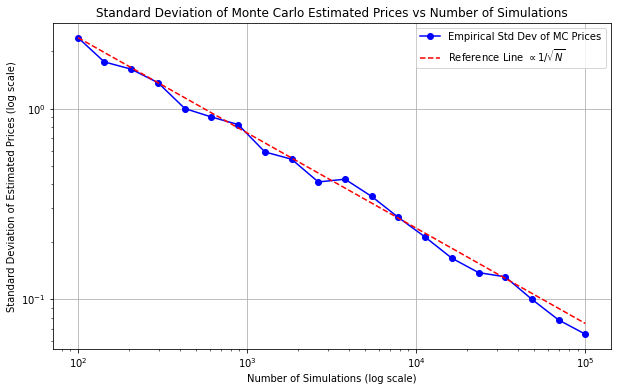

In [31]:
num_prices = 100

N_vec = np.logspace(2, 5, 20, dtype=int)
std_devs = []

for N in N_vec:
    prices_N = []
    for _ in range(num_prices):
        price = monte_carlo_call(S0, K, T, r, sigma, N)
        prices_N.append(price)

    std_devs.append(np.std(prices_N, ddof=1))

plt.figure(figsize=(10, 6))
plt.plot(N_vec, std_devs, 'bo-', label='Empirical Std Dev of MC Prices')
C = std_devs[0] * np.sqrt(N_vec[0])
ref_line = C / np.sqrt(N_vec)
plt.plot(N_vec, ref_line, 'r--', label=r'Reference Line $\propto 1/\sqrt{N}$')
plt.xscale('log')
plt.yscale('log')
plt.title('Standard Deviation of Monte Carlo Estimated Prices vs Number of Simulations')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('Standard Deviation of Estimated Prices (log scale)')
plt.legend()
plt.grid(True)
plt.show()

L'écart-type empirique suit très bien la tendance théorique, confirmant que l'erreur de l'estimation Monte Carlo diminue comme $1/\sqrt{N}$ et donc le théorème central limite s'applique.\
Pour diviser l'erreur par 10, il faudrait multiplier le nombre de simulations par 100.

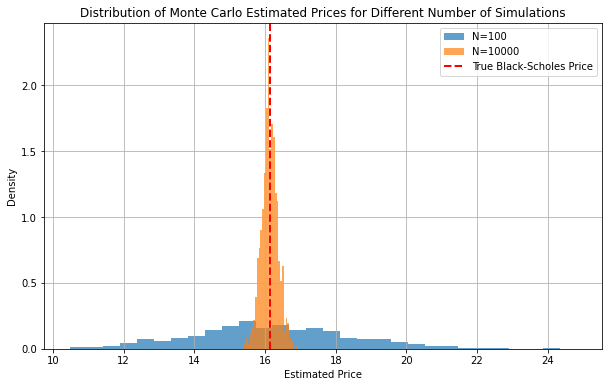

In [33]:
num_prices = 1000

N_low = 100
N_high = 10000

prices_low = []
prices_high = []
for _ in range(num_prices):
    price_low = monte_carlo_call(S0, K, T, r, sigma, N_low)
    prices_low.append(price_low)

    price_high = monte_carlo_call(S0, K, T, r, sigma, N_high)
    prices_high.append(price_high)

plt.figure(figsize=(10, 6))
plt.hist(prices_low, bins=30, density=True, alpha=0.7, label=f'N={N_low}')
plt.hist(prices_high, bins=30, density=True, alpha=0.7, label=f'N={N_high}')
plt.axvline(true_price, color='red', linestyle='--', linewidth=2, label='True Black-Scholes Price')
plt.legend()
plt.title('Distribution of Monte Carlo Estimated Prices for Different Number of Simulations')
plt.xlabel('Estimated Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

On obtient deux distributions normales centrées sur le vrai prix donné par Black-Scholes. L'estimation Monte Carlo est donc non biaisée et on confirme que le théorème central limite s'applique.\
La distribution pour N = 10000 est plus concentrée autour du vrai prix que pour N = 100, illustrant la diminution de l'erreur avec l'augmentation du nombre de simulations.

In [34]:
%%timeit -n 10 -r 5
monte_carlo_call(S0, K, T, r, sigma, 10**6)

90.4 ms ± 3.63 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


## TP Question 2 : Réduction de variance

In [ ]:
# Model values
S0 = 100    # initial stock price
K = 100     # strike price
T = 1.0     # time to maturity in years
r = 0.05    # risk-free rate
sigma = 0.2 # volatility
d = 12      # number of observations
N = 10**5   # number of simulations

In [37]:
def generate_paths(S0, T, r, sigma, d, N):
    dt = T / d

    # Brownian increments
    Z = np.random.standard_normal((N, d))

    S = np.zeros((N, d + 1))
    S[:, 0] = S0

    drift = (r - 0.5 * sigma**2) * dt
    vol = sigma * np.sqrt(dt)

    for i in range(d):
        S[:, i + 1] = S[:, i] * np.exp(drift + vol * Z[:, i])

    return S

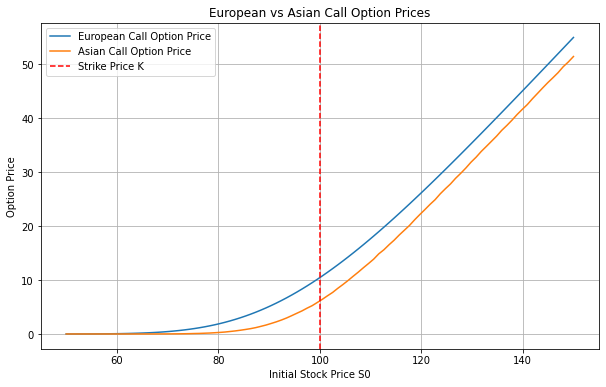

In [38]:
# Comparison of European and Asian Call Options Prices

S0_range = np.linspace(50, 150, 100)
european_prices = []
asian_prices = []

for S0 in S0_range:
    european_prices.append(black_scholes_call(S0, K, T, r, sigma))

    paths = generate_paths(S0, T, r, sigma, d, N)
    average_prices = np.mean(paths[:, 1:], axis=1)
    asian_payoffs = np.maximum(average_prices - K, 0)
    asian_price = np.exp(-r * T) * np.mean(asian_payoffs)
    asian_prices.append(asian_price)

plt.figure(figsize=(10, 6))
plt.plot(S0_range, european_prices, label='European Call Option Price')
plt.plot(S0_range, asian_prices, label='Asian Call Option Price')
plt.axvline(K, color='red', linestyle='--', label='Strike Price K')
plt.title('European vs Asian Call Option Prices')
plt.xlabel('Initial Stock Price S0')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

L'option asiatique est une option sur la moyenne. Elle sera donc moins volatile que le call européen classique. Par conséquent, son prix sera généralement inférieur à celui du call européen classique, car la moyenne lisse les fluctuations extrêmes du prix du sous-jacent.

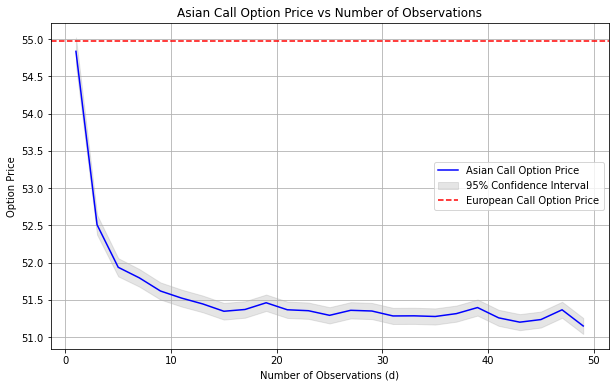

In [42]:
d_values = range(1, 51, 2)
prices = []
ci_widths = []

for d_val in d_values:
    paths = generate_paths(S0, T, r, sigma, d_val, N)
    average_prices = np.mean(paths[:, 1:], axis=1)
    asian_payoffs = np.maximum(average_prices - K, 0)
    asian_price = np.exp(-r * T) * np.mean(asian_payoffs)
    prices.append(asian_price)

    SE = np.std(np.exp(-r * T) * asian_payoffs) / np.sqrt(N)
    ci_width = 1.96 * SE
    ci_widths.append(ci_width)

prices = np.array(prices)
ci_widths = np.array(ci_widths)

plt.figure(figsize=(10, 6))
plt.plot(d_values, prices, 'b-', label='Asian Call Option Price')
plt.fill_between(d_values, prices - ci_widths, prices + ci_widths, color='gray', alpha=0.2, label='95% Confidence Interval')
plt.axhline(black_scholes_call(S0, K, T, r, sigma), color='red', linestyle='--', label='European Call Option Price')
plt.title('Asian Call Option Price vs Number of Observations')
plt.xlabel('Number of Observations (d)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

Si d = 1, alors l'option asiatique revient à une option européenne classique, car la moyenne du prix du sous-jacent à un seul instant est simplement le prix à cet instant. Si d augmente, la moyenne devient plus stable et l'option asiatique devient moins sensible aux fluctuations du prix du sous-jacent. Par conséquent, le prix de l'option asiatique diminue avec l'augmentation de d, car la moyenne réduit la volatilité perçue du sous-jacent.

In [ ]:
def pricing_with_control_variate(S0, K, T, r, sigma, d, N, type_Z):
    paths = generate_paths(S0, T, r, sigma, d, N)
    average_prices = np.mean(paths[:, 1:], axis=1)
    Y= np.exp(-r * T) * np.maximum(average_prices - K, 0)

    dt = T / d
    times = np.linspace(dt, T, d)

    if type_Z == "ST":
        Z = paths[:, -1]
        E_Z = S0 * np.exp(r * T)
    
    elif type_Z == "Average":
        Z = np.mean(paths[:, 1:], axis=1)
        expected_spots = S0 * np.exp(r * times)
        E_Z = np.mean(expected_spots)

    elif type_Z == "EuroCall":
        ST = paths[:, -1]
        Z = np.exp(-r * T) * np.maximum(ST - K, 0)
        E_Z = black_scholes_call(S0, K, T, r, sigma)

    cov_matrix = np.cov(Y, Z)
    cov_YZ = cov_matrix[0, 1]
    var_Z = cov_matrix[1, 1]
    c_star = cov_YZ / var_Z

    Y_cv = Y - c_star * (Z - E_Z)

    price_mc = np.mean(Y)
    price_cv = np.mean(Y_cv)
    Var_Y = np.var(Y)
    Var_Y_cv = np.var(Y_cv)

    ratio = Var_Y / Var_Y_cv

    rho = np.corrcoef(Y, Z)[0, 1]
    theoretical_ratio = 1 / (1 - rho**2)

    return {
        "Type": type_Z,
        "Standard MC Price": price_mc,
        "Control Variate Price": price_cv,
        "Standard MC Variance": Var_Y,
        "Control Variate Variance": Var_Y_cv,
        "Variance Reduction Ratio (Empirical)": ratio,
        "Correlation": rho
    }

In [51]:
# Z = S_T
print(f"{'Type Z':<15} | {'Price':<10} | {'Variance Reduction Ratio':<10} | {'Correlation':<10}")
res_ST = pricing_with_control_variate(S0, K, T, r, sigma, d, N, "ST")
print(f"{res_ST['Type']:<15} | {res_ST['Control Variate Price']:<10.4f} | {res_ST['Variance Reduction Ratio (Empirical)']:<24.2f} | {res_ST['Correlation']:<.4f}")

# Z = Average Price
res_Average = pricing_with_control_variate(S0, K, T, r, sigma, d, N, "Average")
print(f"{res_Average['Type']:<15} | {res_Average['Control Variate Price']:<10.4f} | {res_Average['Variance Reduction Ratio (Empirical)']:<24.2f} | {res_Average['Correlation']:<.4f}")

# Z = European Call Price
res_EuroCall = pricing_with_control_variate(S0, K, T, r, sigma, d, N, "EuroCall")
print(f"{res_EuroCall['Type']:<15} | {res_EuroCall['Control Variate Price']:<10.4f} | {res_EuroCall['Variance Reduction Ratio (Empirical)']:<24.2f} | {res_EuroCall['Correlation']:<.4f}")

Type Z          | Price      | Variance Reduction Ratio | Correlation
ST              | 51.5506    | 4.56                     | 0.8835
Average         | 51.4941    | 309554.61                | 1.0000
EuroCall        | 51.4830    | 4.53                     | 0.8827


Question 3 : La corrélation est positive et autour de 0.9. La réduction de variance est donc efficace ici, car le contrôle utilisé (prix du sous-jacent à maturité) est fortement corrélé avec la variable d'intérêt (payoff de l'option asiatique).

Question 4 :\
Pour la moyenne, la corrélation vaut 1 et le facteur de réduction de variance est extrêmement élevé. Cela signifie que l'estimateur avec contrôle élimine presque toute la variance, conduisant à une estimation très précise du prix de l'option asiatique.\
Pour l'eurocall, les résultats sont très similaires à ceux de la question 3, les deux options réagissent de la meme manière aux mouvements du marché.

In [52]:
def pricing_with_multiple_control_variates(S0, K, T, r, sigma, d, N):
    paths = generate_paths(S0, T, r, sigma, d, N)
    average_prices = np.mean(paths[:, 1:], axis=1)
    Y= np.exp(-r * T) * np.maximum(average_prices - K, 0)

    dt = T / d
    times = np.linspace(dt, T, d)

    # Spot average
    Z1 = np.mean(paths[:, 1:], axis=1)
    E_Z1 = np.mean(S0 * np.exp(r * times))

    # Final price ST
    Z2 = paths[:, -1]
    E_Z2 = S0 * np.exp(r * T)

    # European Call Price
    Z3 = np.exp(-r * T) * np.maximum(Z2 - K, 0)
    E_Z3 = black_scholes_call(S0, K, T, r, sigma)

    Controls = np.vstack([Z1 - E_Z1, Z2 - E_Z2, Z3 - E_Z3]).T
    covariance_matrix = np.cov(np.hstack([Y.reshape(-1, 1), Controls]).T)

    Sigma_ZZ = covariance_matrix[1:, 1:]
    Sigma_YZ = covariance_matrix[0, 1:]

    c_star = np.linalg.solve(Sigma_ZZ, Sigma_YZ)
    print(f"Optimal coefficients c*: {c_star}")

    adjustment = np.dot(Controls, c_star)
    Y_cv = Y - adjustment

    var_Y = np.var(Y)
    var_Y_cv = np.var(Y_cv)
    reduction_factor = var_Y / var_Y_cv

    return np.mean(Y_cv), reduction_factor

In [53]:
price_multi_cv, reduction_factor_multi = pricing_with_multiple_control_variates(S0, K, T, r, sigma, d, N)
print(f"Asian option price with Multiple Control Variates: {price_multi_cv:.4f}")
print(f"Variance Reduction Factor with Multiple Control Variates: {reduction_factor_multi:.2f}")

Optimal coefficients c*: [ 0.95116636 -0.00854698  0.00904484]
Asian option price with Multiple Control Variates: 51.4942
Variance Reduction Factor with Multiple Control Variates: 161333.30


On a un facteur de réduction de variance extrêmement élevé avec les trois variables de contrôle. Cela montre que l'utilisation conjointe des trois contrôles améliore significativement la précision de l'estimation du prix de l'option asiatique par rapport à l'utilisation d'un seul contrôle.

In [56]:
def exact_geometric_asian_option_price(S0, K, T, r, sigma, d):
    dt = T / d
    times = np.linspace(dt, T, d)

    mu_G = np.log(S0) + ( r - 0.5 * sigma**2) * np.mean(times)

    sum_cov = 0
    for ti in times:
        for tj in times:
            sum_cov += min(ti, tj)

    var_G = (sigma**2 / d**2) * sum_cov
    sigma_G = np.sqrt(var_G)

    d1 = (mu_G - np.log(K) + var_G) / sigma_G
    d2 = d1 - sigma_G

    price = np.exp(-r * T) * (np.exp(mu_G + 0.5 * var_G) * norm.cdf(d1) - K * norm.cdf(d2))
    return price


def monte_carlo_geometric(S0, K, T, r, sigma, d, N):
    paths = generate_paths(S0, T, r, sigma, d, N)

    log_paths = np.log(paths[:, 1:])
    G_T = np.exp(np.mean(log_paths, axis=1))

    payoffs = np.exp(-r * T) * np.maximum(G_T - K, 0)
    price = np.mean(payoffs)

    se = np.std(payoffs) / np.sqrt(N)
    return price, price - 1.96 * se, price + 1.96 * se

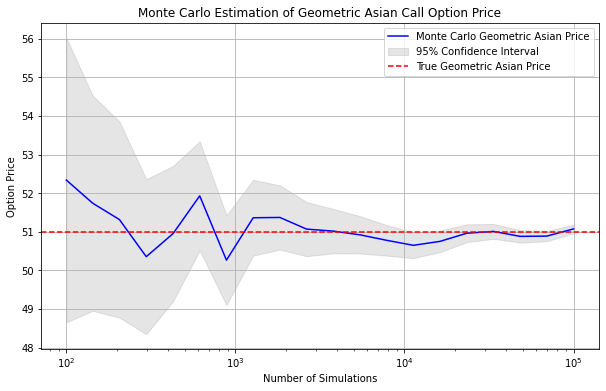

In [57]:
# Asiactic Geometric Option Price
true_geo_price = exact_geometric_asian_option_price(S0, K, T, r, sigma, d)

N_vec_geo = np.logspace(2, 5, 20, dtype=int)
mc_geo_prices = []
mc_geo_ci = []

for N_val in N_vec_geo:
    price, low, N_high = monte_carlo_geometric(S0, K, T, r, sigma, d, N_val)
    mc_geo_prices.append(price)
    mc_geo_ci.append((low, N_high))

mc_geo_prices = np.array(mc_geo_prices)
lows = [x[0] for x in mc_geo_ci]
highs = [x[1] for x in mc_geo_ci]

plt.figure(figsize=(10, 6))
plt.plot(N_vec_geo, mc_geo_prices, 'b-', label='Monte Carlo Geometric Asian Price')
plt.fill_between(N_vec_geo, lows, highs, color='gray', alpha=0.2, label='95% Confidence Interval')
plt.axhline(true_geo_price, color='red', linestyle='--', label='True Geometric Asian Price')
plt.xscale('log')
plt.title('Monte Carlo Estimation of Geometric Asian Call Option Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()

Bonus: Montrons pourquoi on parle d'option asiatique géométrique.
Nous allons en particulier montrer que l'option asiatique arithmétique et l'option asiatique géométrique sont corrélées à 99%.

In [58]:
def pricing_arithmetic_with_geo_control(S0, K, T, r, sigma, d, N):
    paths = generate_paths(S0, T, r, sigma, d, N)
    prices_path = paths[:, 1:]

    mean_arith = np.mean(prices_path, axis=1)
    Y = np.exp(-r * T) * np.maximum(mean_arith - K, 0)

    mean_geo = np.exp(np.mean(np.log(prices_path), axis=1))
    Z = np.exp(-r * T) * np.maximum(mean_geo - K, 0)
    E_Z = exact_geometric_asian_option_price(S0, K, T, r, sigma, d)

    cov_matrix = np.cov(Y, Z)
    cov_YZ = cov_matrix[0, 1]
    var_Z = cov_matrix[1, 1]
    c_star = cov_YZ / var_Z

    Y_cv = Y - c_star * (Z - E_Z)

    price_std = np.mean(Y)
    price_cv = np.mean(Y_cv)
    var_std = np.var(Y)
    var_cv = np.var(Y_cv)
    rho = np.corrcoef(Y, Z)[0, 1]
    
    return price_std, price_cv, var_std, var_cv, rho

In [61]:
price_std, price_cv, var_std, var_cv, rho = pricing_arithmetic_with_geo_control(S0, K, T, r, sigma, d, N)

print(f"Correlation between Arithmetic and Geometric Asian Payoffs: {rho:.6f}")
print(f"Standard MC Price: {price_std:.4f} | Variance: {var_std:.6f}")
print(f"Control Variate MC Price: {price_cv:.4f} | Variance: {var_cv:.6f}")
print(f"Variance Reduction Factor: {var_std / var_cv:.2f}")

Correlation between Arithmetic and Geometric Asian Payoffs: 0.999674
Standard MC Price: 51.5262 | Variance: 328.446659
Control Variate MC Price: 51.4905 | Variance: 0.214138
Variance Reduction Factor: 1533.81


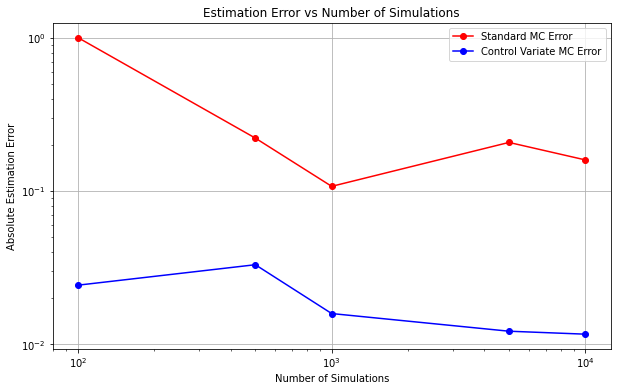

In [64]:
N_vec = [100, 500, 1000, 5000, 10000]
std_errors = []
cv_errors = []

ref_price, _, _, _, _ = pricing_arithmetic_with_geo_control(S0, K, T, r, sigma, d, 5*10**6)

for N_val in N_vec:
    price_std, price_cv, _, _, _ = pricing_arithmetic_with_geo_control(S0, K, T, r, sigma, d, N_val)
    std_errors.append(abs(price_std - ref_price))
    cv_errors.append(abs(price_cv - ref_price))

plt.figure(figsize=(10, 6))
plt.plot(N_vec, std_errors, 'r-o', label='Standard MC Error')
plt.plot(N_vec, cv_errors, 'b-o', label='Control Variate MC Error')
plt.yscale('log')
plt.xscale('log')
plt.title('Estimation Error vs Number of Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Absolute Estimation Error')
plt.legend()
plt.grid(True)
plt.show()